### Build a linear regression model using scikit learn in boston data to predict 'Price' based on other dependent variable.

In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


In [6]:
from sklearn.datasets import load_boston
boston = load_boston()


In [7]:
bos = pd.DataFrame(boston.data)

In [8]:
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
bos.shape

(506, 13)

In [10]:
bos.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [20]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [21]:
bos = pd.DataFrame(boston.data, columns = boston.feature_names)
bos['PRICE'] = boston.target

In [22]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [23]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [28]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PRICE', ylabel='Density'>

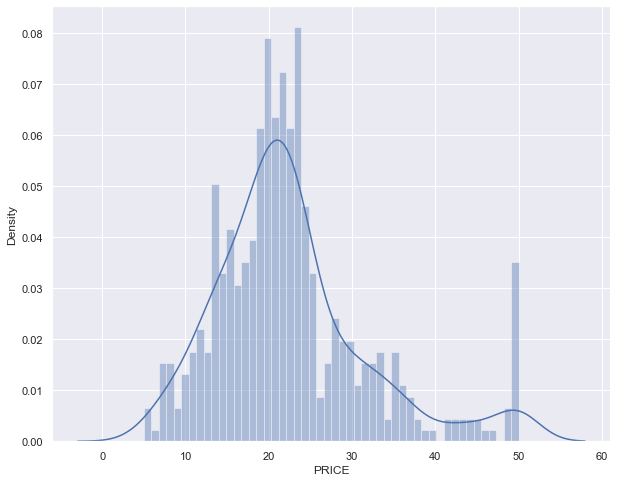

In [78]:
# Let us plot the distribution of "PRICE"
sns.set(rc={'figure.figsize':(10,8)})
sns.distplot(bos['PRICE'], bins=50)

<AxesSubplot:>

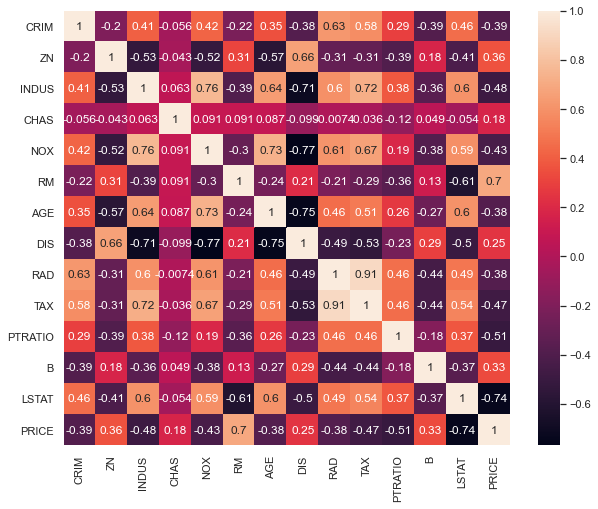

In [40]:
# Let us see the correlation
corr = bos.corr()
sns.heatmap(corr, annot = True)

<AxesSubplot:>

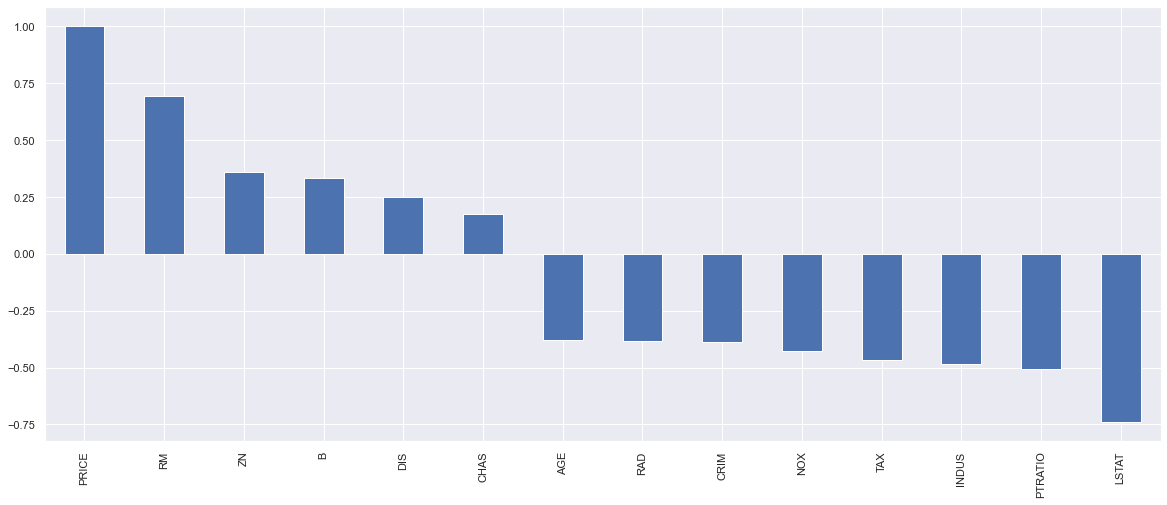

In [76]:
plt.figure(figsize=(20,8))

bos.corr()["PRICE"].sort_values(ascending = False).plot(kind = "bar")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='PTRATIO', ylabel='PRICE'>

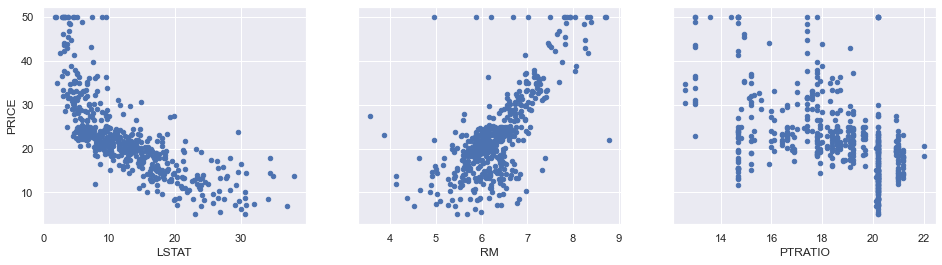

In [60]:
# Top three significant features by correlation are "RM", "PTRATIO" and "LSTAT".


fig, axs = plt.subplots(1, 3, sharey=True)
bos.plot(kind='scatter', x='LSTAT', y='PRICE', ax=axs[0], figsize=(16, 4))
bos.plot(kind='scatter', x='RM', y='PRICE', ax=axs[1])
bos.plot(kind='scatter', x='PTRATIO', y='PRICE', ax=axs[2])

#### Selecting only LSTAT and RM

There is a positive linear relationship between Price and RM and a negative linear relationship between Price and RM. So, let us select only those two features.

In [96]:
y1 = bos["PRICE"]
x1 = bos[["LSTAT", "RM"]]

In [79]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size = 0.2, random_state = 4)

In [80]:
from sklearn.linear_model import LinearRegression
lm1 = LinearRegression()

In [81]:
lm1.fit(x1_train,y1_train)

LinearRegression()

In [82]:
# Let us predict price

y1_predict = lm1.predict(x1_test)

### Model Evaluation

In [91]:
# R-squared value
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print("Adjusted R-squared :" ,r2_score(y1_test,y1_predict))


Adjusted R-squared : 0.6420358191045996


In [88]:
# Adjusted R-squared
print('Adjusted R^2:',1 - (1-r2_score(y1_test, y1_predict))*(len(y)-1)/(len(y)-x1_train.shape[1]-1))

Adjusted R^2: 0.6406125022819539


In [92]:
# Mean Absolute Error
print('MAE:', mean_absolute_error(y1_test,y1_predict))

MAE: 3.904262511555511


In [94]:
# Mean Squared Error
print('MSE:', mean_squared_error(y1_test,y1_predict))

MSE: 33.2510151037294


In [95]:
# Root Mean Squared Error
print('RMSE:',np.sqrt(mean_squared_error(y1_test,y1_predict)))

RMSE: 5.766369317319989


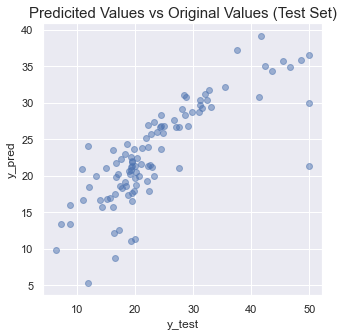

In [101]:
plt.figure(figsize=(5,5))
plt.scatter(x=y1_test,y=y1_predict,alpha=0.5)
plt.xlabel('y_test',size=12)
plt.ylabel('y_pred',size=12)
plt.title('Predicited Values vs Original Values (Test Set)',size=15)
plt.show()

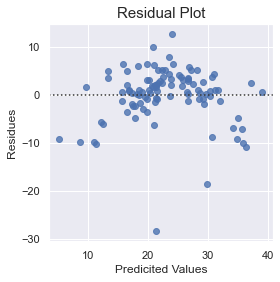

In [103]:
plt.figure(figsize=(4,4))
sns.residplot(y1_predict,(y1_predict-y1_test))
plt.xlabel('Predicited Values',size=12)
plt.ylabel("Residues",size=12)
plt.title('Residual Plot',size=15)
plt.show()

### Feature Scaling and Feature Selection



In [117]:
y2 = data["PRICE"]
x2 = data.drop(["PRICE"], axis = 1)

In [118]:
x2_train,x2_test,y2_train,y2_test = train_test_split(x2,y2,test_size = 0.2, random_state = 300)

In [119]:
feature_scale=[feature for feature in x2_train.columns if feature not in ["PRICE"]]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(x2_train[feature_scale])

MinMaxScaler()

In [120]:
scaler.transform(x2_train[feature_scale])

array([[1.11388596e-01, 0.00000000e+00, 6.46627566e-01, ...,
        8.08510638e-01, 8.51883605e-01, 7.79249448e-01],
       [1.11481886e-01, 0.00000000e+00, 6.46627566e-01, ...,
        8.08510638e-01, 9.78869333e-01, 4.05905077e-01],
       [7.05070075e-04, 0.00000000e+00, 6.30498534e-02, ...,
        6.48936170e-01, 1.00000000e+00, 9.93377483e-02],
       ...,
       [7.63342381e-01, 0.00000000e+00, 6.46627566e-01, ...,
        8.08510638e-01, 9.69917797e-01, 5.86368653e-01],
       [6.40875316e-02, 0.00000000e+00, 6.46627566e-01, ...,
        8.08510638e-01, 9.90342428e-01, 1.65838852e-01],
       [4.82624007e-03, 0.00000000e+00, 3.71334311e-01, ...,
        6.38297872e-01, 1.00000000e+00, 5.89403974e-01]])

In [121]:
scaler.transform(x2_test[feature_scale])

array([[1.82344856e-02, 0.00000000e+00, 7.85557185e-01, ...,
        9.14893617e-01, 1.00000000e+00, 9.01766004e-01],
       [1.89648452e-03, 0.00000000e+00, 2.01612903e-01, ...,
        7.02127660e-01, 9.91250189e-01, 2.31788079e-01],
       [3.85613648e-03, 0.00000000e+00, 3.46041056e-01, ...,
        6.17021277e-01, 9.98335771e-01, 2.27373068e-01],
       ...,
       [1.61036297e-01, 0.00000000e+00, 6.46627566e-01, ...,
        8.08510638e-01, 9.39533007e-01, 7.97185430e-01],
       [7.38665715e-03, 2.00000000e-01, 1.28665689e-01, ...,
        4.25531915e-02, 9.65681577e-01, 1.67218543e-01],
       [4.37788609e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 2.02814570e-01]])

In [115]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [126]:
### Apply Feature Selection
# first, I specify the Lasso Regression model, and I
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

# Then I use the selectFromModel object from sklearn, which
# will select the features which coefficients are non-zero

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(x2_train, y2_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [127]:
feature_sel_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

#### All features are selected

In [128]:
lm2= LinearRegression()
lm2.fit(x2_train, y2_train)


LinearRegression()

In [130]:
y2_predict = lm2.predict(x2_test)


In [131]:
# R-squared value
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print("Adjusted R-squared :" ,r2_score(y2_test,y2_predict))

# Adjusted R-squared
print('Adjusted R^2:',1 - (1-r2_score(y2_test,y2_predict))*(len(y)-1)/(len(y)-x2_train.shape[1]-1))

# Mean Absolute Error
print('MAE:', mean_absolute_error(y2_test,y2_predict))

# Mean Squared Error
print('MSE:', mean_squared_error(y2_test,y2_predict))

# Root Mean Squared Error
print('RMSE:',np.sqrt(mean_squared_error(y2_test,y2_predict)))

Adjusted R-squared : 0.696086054999139
Adjusted R^2: 0.6880558084848887
MAE: 3.18611570074729
MSE: 22.405655693044384
RMSE: 4.733461280399829


In [134]:
# For training data

# R-squared value

print("Adjusted R-squared :" ,lm2.score(x2_train, y2_train))

# Adjusted R-squared
print('Adjusted R^2:',1 - (1-lm2.score(x2_train, y2_train))*(len(y)-1)/(len(y)-x2_train.shape[1]-1))

Adjusted R-squared : 0.7474594432865731
Adjusted R^2: 0.7407866236986167


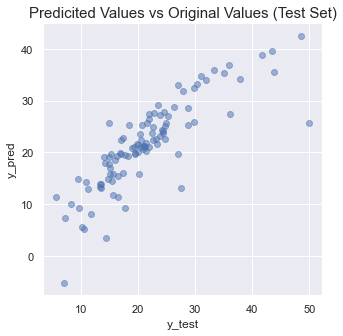

In [132]:
plt.figure(figsize=(5,5))
plt.scatter(x=y2_test,y=y2_predict,alpha=0.5)
plt.xlabel('y_test',size=12)
plt.ylabel('y_pred',size=12)
plt.title('Predicited Values vs Original Values (Test Set)',size=15)
plt.show()

So it looks like our model r2 score is less on the test data.

Let's see if our model is overfitting our training data.

In [135]:
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression


# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x2_train, y2_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [136]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

0.0016946196465013926

In [137]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(x2_train, y2_train)

Lasso(alpha=0.0016946196465013926)

In [138]:
lasso_reg.score(x2_test, y2_test)

0.6965783662708238

Score is same for Lasso compared to Linear Regression. So, there is no overfitting.

### Delete outlier and model

In [141]:
bos_data = bos[bos["PRICE"] != 50]

In [142]:
bos_data.shape

(490, 14)

In [146]:
y3 = bos_data["PRICE"]
x3 = bos_data.drop(["PRICE"], axis = 1)

In [147]:
x3_train,x3_test,y3_train,y3_test = train_test_split(x3,y3,test_size = 0.2, random_state = 100)

In [148]:
lm3 = LinearRegression()
lm3.fit(x3_train,y3_train)

LinearRegression()

In [149]:
y3_predict = lm3.predict(x3_test)

In [150]:
# R-squared value
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print("Adjusted R-squared :" ,r2_score(y3_test,y3_predict))

# Adjusted R-squared
print('Adjusted R^2:',1 - (1-r2_score(y3_test,y3_predict))*(len(y)-1)/(len(y)-x3_train.shape[1]-1))

# Mean Absolute Error
print('MAE:', mean_absolute_error(y3_test,y3_predict))

# Mean Squared Error
print('MSE:', mean_squared_error(y3_test,y3_predict))

# Root Mean Squared Error
print('RMSE:',np.sqrt(mean_squared_error(y3_test,y3_predict)))

Adjusted R-squared : 0.8509323089087225
Adjusted R^2: 0.8469935284530586
MAE: 2.4762383169302344
MSE: 11.273813153933567
RMSE: 3.357649945115418


Deleting outlier has improved model score from 69% to 85%

In [153]:
# R-squared value
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print("Adjusted R-squared :" ,lm3.score(x3_train,y3_train))

# Adjusted R-squared
print('Adjusted R^2:',1 - (1-lm3.score(x3_train,y3_train))*(len(y3)-1)/(len(y3)-x3_train.shape[1]-1))

Adjusted R-squared : 0.7516769195083004
Adjusted R^2: 0.7448949866377288


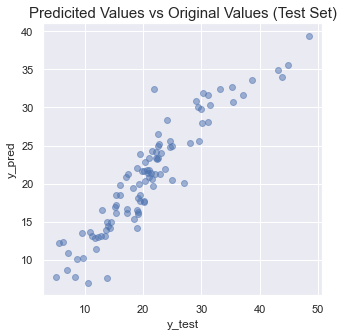

In [154]:
plt.figure(figsize=(5,5))
plt.scatter(x=y3_test,y=y3_predict,alpha=0.5)
plt.xlabel('y_test',size=12)
plt.ylabel('y_pred',size=12)
plt.title('Predicited Values vs Original Values (Test Set)',size=15)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


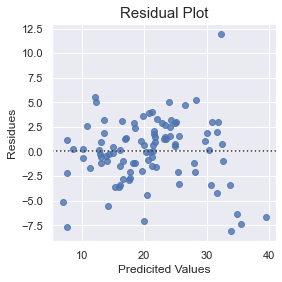

In [155]:
plt.figure(figsize=(4,4))
sns.residplot(y3_predict,(y3_predict-y3_test))
plt.xlabel('Predicited Values',size=12)
plt.ylabel("Residues",size=12)
plt.title('Residual Plot',size=15)
plt.show()